<a href="https://colab.research.google.com/github/Miloni1/Miloni1/blob/main/Miloni__FinalProject_Choosing_the_right_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [ ]:
pip install azureml-core

     |████████████████████████████████| 2.5 MB 14.5 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 94 kB 1.3 MB/s 
     |████████████████████████████████| 1.8 MB 35.2 MB/s 
     |████████████████████████████████| 412 kB 40.7 MB/s 
     |████████████████████████████████| 59 kB 3.3 MB/s 
     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 141 kB 44.1 MB/s 
     |████████████████████████████████| 3.6 MB 51.5 MB/s 
     |████████████████████████████████| 928 kB 40.3 MB/s 
     |████████████████████████████████| 211 kB 52.4 MB/s 
     |████████████████████████████████| 146 kB 36.3 MB/s 
     |████████████████████████████████| 178 kB 39.4 MB/s 
     |████████████████████████████████| 2.3 MB 39.2 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |██████████████████████

In [ ]:
pip install azureml-dataprep

     |████████████████████████████████| 39.0 MB 1.2 MB/s 
     |████████████████████████████████| 129 kB 62.3 MB/s 
     |████████████████████████████████| 14.4 MB 47.8 MB/s 
     |████████████████████████████████| 29.3 MB 47.6 MB/s 
     |████████████████████████████████| 1.3 MB 52.4 MB/s 


In [ ]:
# azureml-core is required
# azureml-dataprep is required

from azureml.core import Workspace, Dataset
import pandas as pd


subscription_id = 'd8c0a903-f30a-45b2-9f3f-f0e757e5e763'
resource_group = 'QA25thMarch'
workspace_name = 'Cities'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='metro_countries_cities')

In [ ]:
# read data 
df = dataset.to_pandas_dataframe()
df.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


### Q. Define the problem domain

In [ ]:
# From this data we can find out:
#City details - geographical location. region, country , city
#Name of railway line in given city.
#More than one railyway lines or network possible in given city.
#Year when the railyway line was setup.
#Year when the given railway line was expanded by adding new routes or stations.
#Number of stations on given railway line.
#Length of the given railway line.
#Number of passengers riding the railyway line.


### Q. Identify candidate questions for your machine learning project

In [ ]:
#Analysis :

#Oldest railway lines.
#newest railway lines.
#longest and shortest railyway lines.
#density of stations - numbers of stations per km
#busiest railyway lines - number of riders 
#least used railway lines.
#least used and most used railway lines per KM
#maximum and minimum railway network by city , country and region. ( add all Kms)

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
df.describe

<bound method NDFrame.describe of                  City        Country                      Name  Year  \
0             Algiers        Algeria             Algiers Metro  2011   
1        Buenos Aires      Argentina  Buenos Aires Underground  1913   
2             Yerevan        Armenia             Yerevan Metro  1981   
3              Sydney      Australia              Sydney Metro  2019   
4              Vienna        Austria             Vienna U-Bahn  1976   
..                ...            ...                       ...   ...   
193          San Juan  United States               Tren Urbano  2004   
194  Washington, D.C.  United States          Washington Metro  1976   
195          Tashkent     Uzbekistan            Tashkent Metro  1977   
196           Caracas      Venezuela             Caracas Metro  1983   
197             Hanoi        Vietnam               Hanoi Metro  2021   

     Expansion_Year  Stations  Length(kms)   Rider  Region  
0              2018        19          1

In [ ]:
df.columns

Index(['city', 'country', 'name', 'year', 'year_last_expansion', 'stations',
       'length_km', 'annual_ridership_mill', 'region'],
      dtype='object')

In [ ]:
df.tail()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
193,San Juan,United States,Tren Urbano,2004,2005,16,172,1.1,north_america
194,"Washington, D.C.",United States,Washington Metro,1976,2014,91,188,68.1,north_america
195,Tashkent,Uzbekistan,Tashkent Metro,1977,2020,39,571,38.8,asia
196,Caracas,Venezuela,Caracas Metro,1983,2015,52,672,358.0,latin_america
197,Hanoi,Vietnam,Hanoi Metro,2021,2021,12,131,0.0,asia


In [ ]:
df.shape

(198, 9)

In [ ]:
df.dtypes

city                      object
country                   object
name                      object
year                       int64
year_last_expansion        int64
stations                   int64
length_km                  int64
annual_ridership_mill    float64
region                    object
dtype: object

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   198 non-null    object 
 1   country                198 non-null    object 
 2   name                   198 non-null    object 
 3   year                   198 non-null    int64  
 4   year_last_expansion    198 non-null    int64  
 5   stations               198 non-null    int64  
 6   length_km              198 non-null    int64  
 7   annual_ridership_mill  198 non-null    float64
 8   region                 198 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 14.0+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.columns
features = ['city', 'country', 'name', 'year', 'year_last_expansion', 'stations',
       'length_km', 'annual_ridership_mill', 'region'] 

In [ ]:
x = df.loc[:, features]
y = df.loc[:, 'region']
x.dropna(inplace=True)
y = y.iloc[x.index]
print(x.shape)
print(y.shape)
x.head()

(198, 9)
(198,)


,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,africa
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,latin_america
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,asia
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,australia
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,europe


In [ ]:
gk = df.groupby('region')


In [ ]:
gk.first()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill
region,,,,,,,,
africa,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30
asia,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75
australia,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90
europe,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80
latin_america,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00
north_america,Montreal,Canada,Montreal Metro,1966,2007,68,71,164.00


Q. Is there any correlation in the data? How would you decide which columns to keep?

In [ ]:
#Replacing Sex variables with numerical categories
df['region'] = df['region'].replace(['africa','asia','australia','europe','latin_america','north_america'],[0,1,2,3,4,5])

In [ ]:
df.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,0
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,4
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,1
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,2
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,3


In [ ]:
df.corr()

,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
year,1.000000,0.371102,-0.303588,0.083004,-0.185124,-0.514108
year_last_expansion,0.371102,1.000000,0.213859,0.112577,0.148290,-0.310913
stations,-0.303588,0.213859,1.000000,0.194416,0.768383,-0.050573
length_km,0.083004,0.112577,0.194416,1.000000,0.194095,-0.148032
annual_ridership_mill,-0.185124,0.148290,0.768383,0.194095,1.000000,-0.183861
region,-0.514108,-0.310913,-0.050573,-0.148032,-0.183861,1.000000


In [ ]:
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6

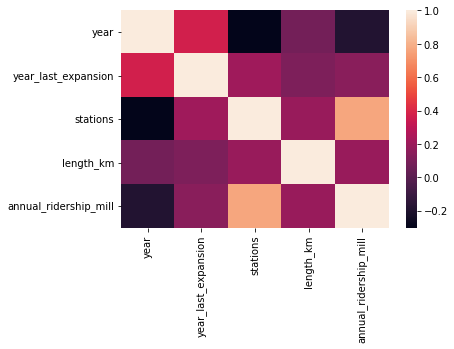

In [ ]:
corr = x.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(corr)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder 

for col in x.columns:
    le = LabelEncoder()
    x[col]= le.fit_transform(x[col])
    
x.head()

,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
0,2,0,2,65,26,12,46,56,0
1,23,1,21,10,27,62,103,75,4
2,182,2,193,38,8,3,34,18,1
3,155,3,164,73,27,6,5,20,2
4,171,4,182,34,25,68,121,156,3


In [ ]:
#print(dict(y.value_counts()).keys())
#print('*************')
all_label_values = list(dict(y.value_counts()).keys())
logic = lambda x: 0 if (x == all_label_values[0] or x== all_label_values[1]) else 1
y2 = y.map(logic)
y2[:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: region, dtype: int64

In [ ]:
df.rename(columns = {'city':'City', 'country':'Country','name':'Name','year':'Year','year_last_expansion':'Expansion_Year','stations':'Stations','length_km':'Length(kms)','annual_ridership_mill':'Rider','region':'Region'}, inplace = True)

In [ ]:
df.head()

,City,Country,Name,Year,Expansion_Year,Stations,Length(kms),Rider,Region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,0
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,4
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,1
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,2
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,3


In [ ]:
# Train stations in particular Region in a year 
df[['Region','Country','Year','Stations']].corr()

,Region,Year,Stations
Region,1.000000,-0.514108,-0.050573
Year,-0.514108,1.000000,-0.303588
Stations,-0.050573,-0.303588,1.000000


In [ ]:
#Number of Stations in each Region
df[['Region','Stations']].value_counts()

Region  Stations
1       20          4
        10          4
        13          4
        56          4
        21          4
                   ..
        138         1
        135         1
        127         1
        126         1
5       424         1
Length: 146, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

Yes there is, Africa as a region has only 2 Cities with Data.

In [ ]:
gk = df.groupby('Region')

In [ ]:
df.head()

,City,Country,Name,Year,Expansion_Year,Stations,Length(kms),Rider,Region
0,Algiers,Algeria,Algiers Metro,2011,2018,19,185,45.30,0
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,90,567,74.00,4
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,134,10.75,1
3,Sydney,Australia,Sydney Metro,2019,2019,13,36,12.90,2
4,Vienna,Austria,Vienna U-Bahn,1976,2017,98,833,459.80,3


In [ ]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore

# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

Yes there are few Features which i converted into integers. I used Label Encoding above.


In [ ]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [ ]:
# One hot encoding-> pandas-> get_dummies 

# data['diagnosis'] - get_dummies


# if there are too many values-> one-hot encoding is NOT an option

# GROUP_BY on ZIP_code or country or state!
# or del that column altogether!

# One Hot encoding

# Sales City Profit
#  100.  London  20
#. 100.  Papua.  60
#  123.  London. 21
#. 65.   Paris.  13
#. 92.   Bandar Seri Begawan 22

# 2 kinds of ML problems- 
# 1) i can use city as a filter and generate multiple models
# one for each city

# 2) Or make a model that is GENERALIZED for each city and impacted
# equally by each city

# result of one hot encoding
# Sales City_London City_Papua City_Paris City_BSB Profit
#  100.  1            0         0          0          20
#. 100.  0            1         0           0      .  60
#  123.  1.            0         0          0         21
#. 65.   0             0         1          0      .  13
#. 92.   0            0          0          1         22




# final ml equation
# profit -> label
# features-> [ 'Sales', 'Cit....']
# profit=w1*Sales+w2*C_Lon+w3*C_Pap+w4*C_Par+w5*City_BSB + bias

# Sales from london
# 20=w1*100 + w2*1+ w3*0+ w4*0+ w5*0 + bias
# 21=w1*123 + w2*1+ w3*0+ w4*0+ w5*0 + bias

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y2,
                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# for loop b/w all your models

# xtrain,xtest, ytrain,ytest = train_test_split

# model.fit-> xTRAIN , xTEST
# predictions = model.predict(xtest)
# accuracy_score/rmse/mae/precision for (predictions, ytest)

# MAJOR-> string/ranges values-> convert into numbers


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# HYPERPARAMETERS-> these are 2 diff HPs for Random Forest 
# SAME algo could also give 2 diff models!
ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

1.0
1.0
0.9
1.0
0.85
0.9


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
from sklearn.naive_bayes import GaussianNB
final_model = GaussianNB()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.9


In [105]:
from joblib import dump
dump(final_model, 'filename.joblib') 

['filename.joblib']

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [104]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [103]:
import sklearn
sklearn.__version__

'1.0.2'